In [1]:
import numpy as np
import matplotlib.pyplot as plt

import glob

from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

#custom functions
from helpers import*
%matplotlib inline

In [2]:
#Load Data

forest_data_path = glob.glob("data/forest/*")
tallbuilding_data_path = glob.glob("data/tallbuilding/*")
highway_data_path = glob.glob("data/highway/*")

cA = []
for item in forest_data_path:
    cA.append(np.loadtxt(item))

cB = []
for item in tallbuilding_data_path:
    cB.append(np.loadtxt(item))
    
cC = []
for item in highway_data_path:
    cC.append(np.loadtxt(item))
    
cA = np.array(cA)
cB = np.array(cB)
cC = np.array(cC)

cA_train,cA_test = train_test_split(cA, test_size=0.3, random_state=42)
cB_train,cB_test = train_test_split(cB, test_size=0.3, random_state=42) 
cC_train,cC_test = train_test_split(cC, test_size=0.3, random_state=42) 

In [3]:
X = cA_train.reshape(-1,23)

[  42.45   50.17   56.2    61.8    66.92   71.41   75.3    79.14   82.63
   85.69   88.29   90.55   92.63   94.39   95.76   97.01   97.98   98.7
   99.38   99.85   99.99  100.    100.  ]


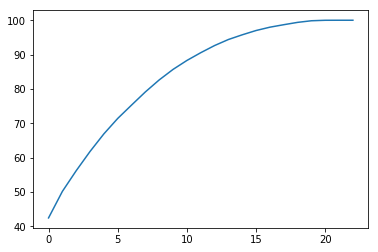

In [7]:
X = scale(X)

pca = PCA(n_components=23)

pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)
plt.plot(var1)
plt.show()

In [9]:
pca = PCA(n_components=10)
pca.fit(X)
X1=pca.fit_transform(X)
print(X1.shape)

[[-2.99494015  0.33571017  0.40138118 ..., -0.83976741  0.90057726
   0.9169917 ]
 [-3.14024124  0.27256726  0.65225036 ..., -0.8978907  -0.45207167
  -0.89677951]
 [-3.84419229  0.77868438  0.46175685 ..., -0.35679675 -0.39623651
  -0.1613198 ]
 ..., 
 [ 5.14902183  0.23807862 -0.47667374 ...,  1.16831171  0.38281464
   1.50318105]
 [ 6.72255097  0.2834553   1.25102207 ...,  0.41988513  0.4419536
   1.04612239]
 [ 6.29160916 -0.33295405  0.25326692 ...,  0.76191827 -1.00958147
   0.0108097 ]]


In [13]:
import numpy as np
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=10, batch_size=36)
ipca.fit(X)

X2 = ipca.transform(X)
print(X2.shape)